**Importing the dependencies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score



import warnings
warnings.filterwarnings('ignore')

In [ ]:
# loading the data from sklearn
from sklearn.datasets import load_breast_cancer
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()
# loading the data to a data frame
breast_cancer_data = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)
# adding the 'target' column to the data frame
breast_cancer_data['label'] = breast_cancer_dataset.target

In [ ]:
#printing the first five columns
breast_cancer_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
#printing the last five columns
breast_cancer_data.tail(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [ ]:
# number of rows and columns in the dataset
print('Number of rows in the dataset: ',breast_cancer_data.shape[0])
print('Number of columns in the dataset: ',breast_cancer_data.shape[1])

Number of rows in the dataset:  569
Number of columns in the dataset:  31


In [ ]:
# getting some info about the data
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
# checking for missing values
breast_cancer_data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

**There is no null value in the dataset**

In [ ]:
breast_cancer_data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
# checking the distribution of Target Variable
breast_cancer_data['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

**Observations**

1. There are total 569 records and 31 features in dataset
2. The datatype of the features are either integer or float
3. In the outcome 0-----> Malignant and 1------> Benign

# Data Visualization

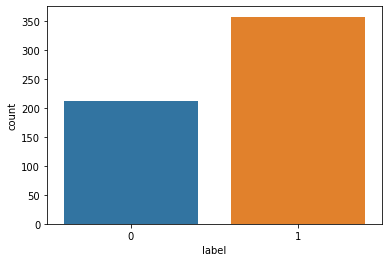

In [ ]:
# Outcome countplot
sns.countplot(x = 'label',data = breast_cancer_data )
plt.show()

We have 357 person with malignant and 212 person benign, so our data is slightly imbalanced

In [ ]:
breast_cancer_data.drop(['label'], axis=1).columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

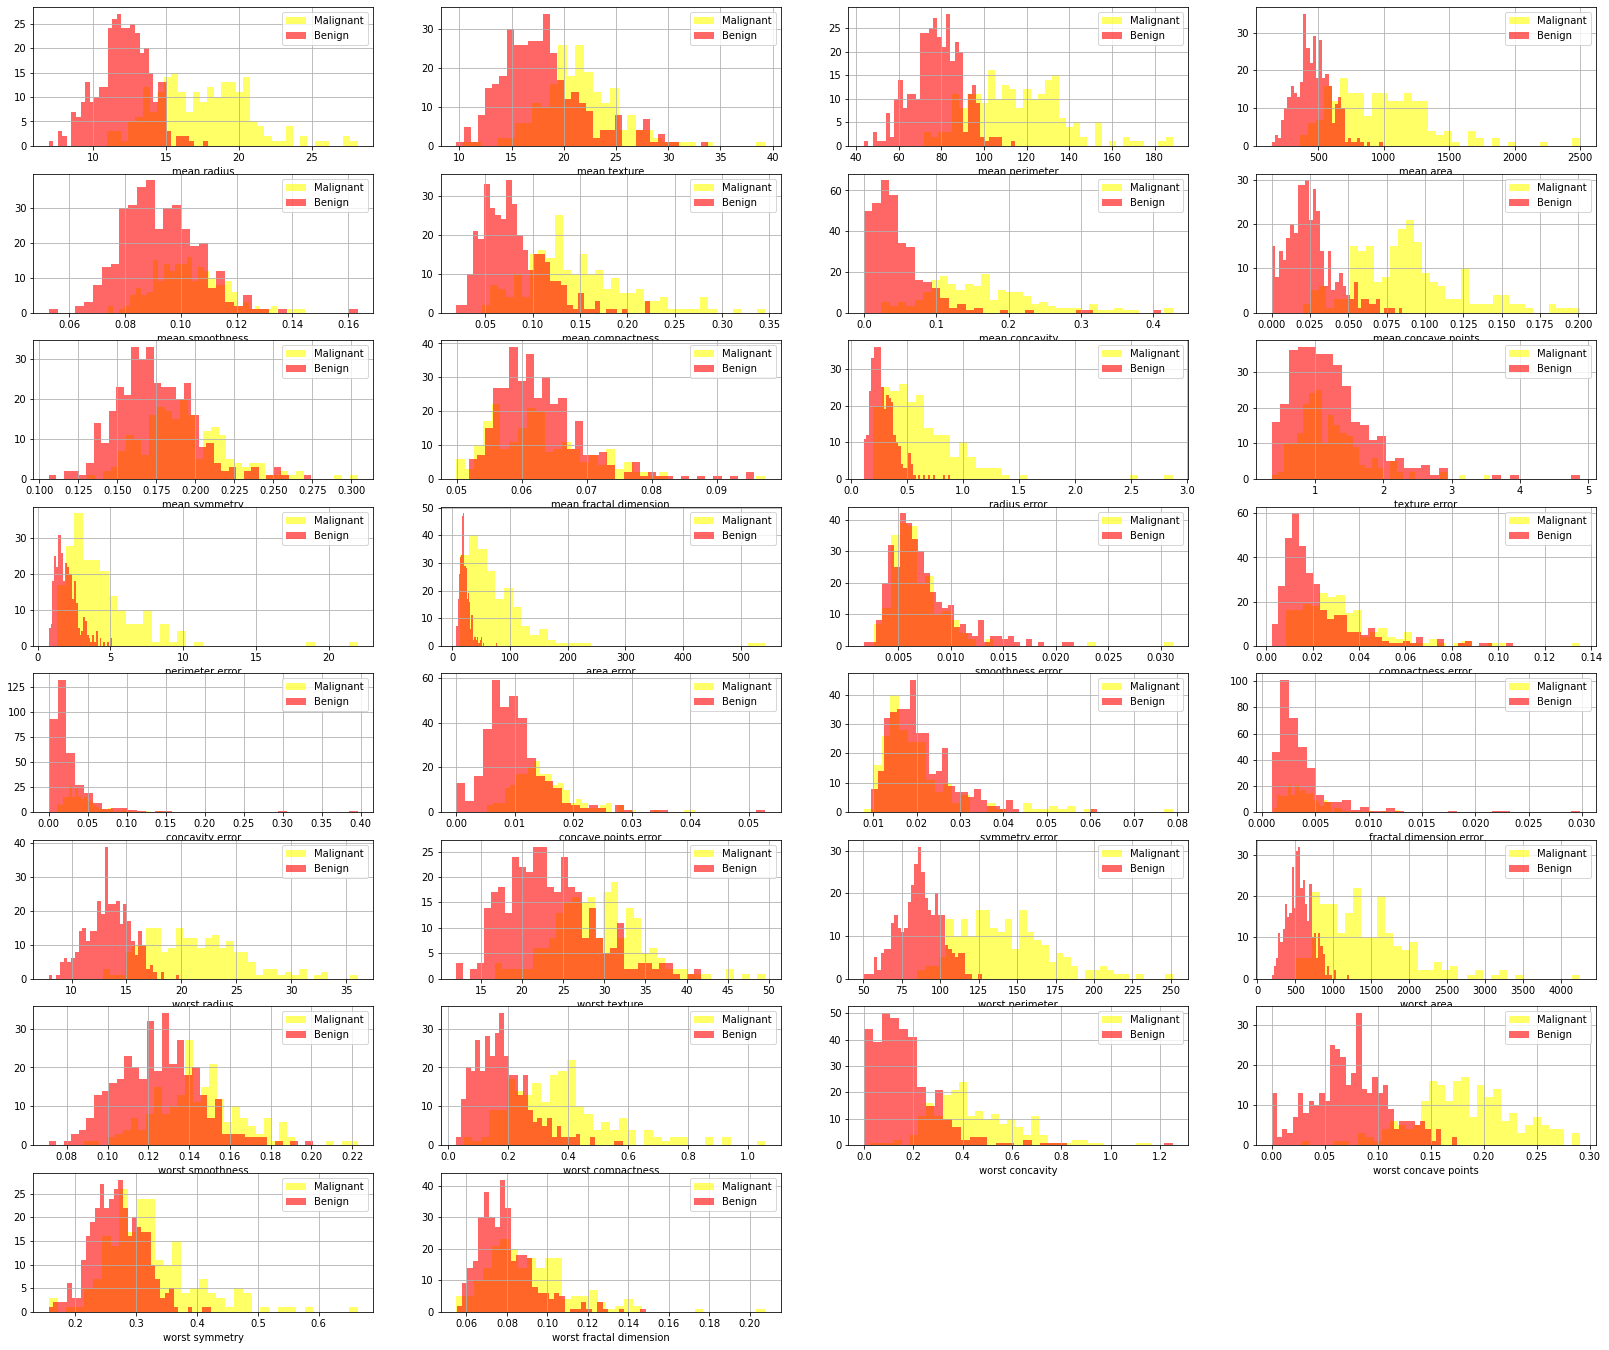

In [ ]:
continous_val =breast_cancer_data.drop(['label'], axis=1)
plt.figure(figsize=(28, 24))
for i, column in enumerate(continous_val,1):
    plt.subplot(8, 4, i)
    breast_cancer_data[breast_cancer_data["label"] == 0][column].hist(bins=35, color='yellow', label='Malignant', alpha=0.6)
    breast_cancer_data[breast_cancer_data["label"] == 1][column].hist(bins=35, color='red', label='Benign', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

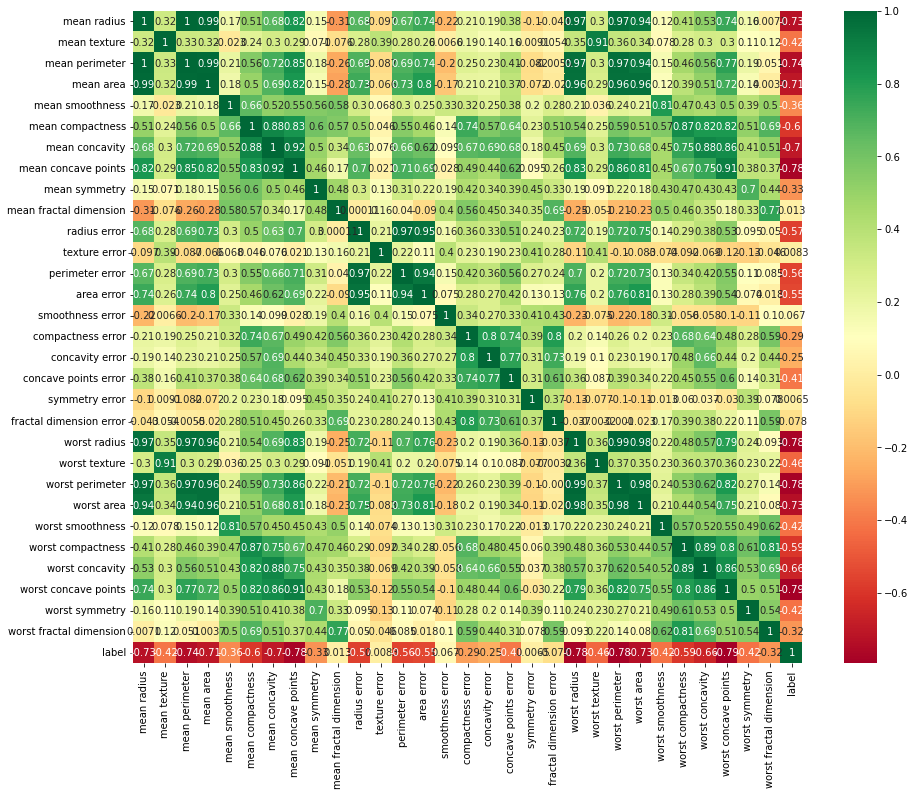

In [ ]:
#heatmap
plt.figure(figsize=(15,12))
sns.heatmap(breast_cancer_data.corr(), annot=True,cmap ='RdYlGn')
plt.show()

## Model Building

In [ ]:
X = breast_cancer_data.drop(columns='label', axis=1)
Y = breast_cancer_data['label']

In [ ]:
scaler = StandardScaler()
X =  pd.DataFrame(scaler.fit_transform(breast_cancer_data.drop(["label"],axis = 1),), columns=['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'])
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [ ]:
#spliting the train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33,random_state=7)

In [ ]:
print('The Shape of X',X.shape)
print('The Shape of X_train',X_train.shape)
print('The Shape of X_test',X_test.shape)

The Shape of X (569, 30)
The Shape of X_train (381, 30)
The Shape of X_test (188, 30)


In [ ]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, Y_train)

RandomForestClassifier()

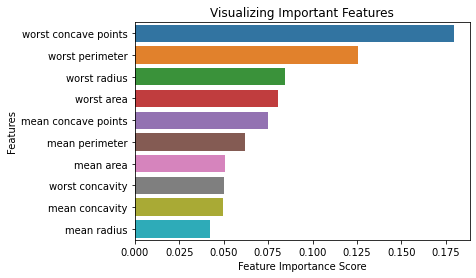

In [ ]:
# view the feature scores
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(10)
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")
# Visualize the graph
plt.show()

**Since we have more columns,we will pick the columns which have more dependency on target column on futher model buildings**

In [ ]:
X = breast_cancer_data[['worst radius','worst perimeter','mean concave points','worst concave points','worst area','mean perimeter','mean concavity','area error','mean area','worst concavity']]
Y = breast_cancer_data['label']

In [ ]:
#spliting the train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33,random_state=7)

In [ ]:
print('The Shape of X',X.shape)
print('The Shape of X_train',X_train.shape)
print('The Shape of X_test',X_test.shape)

The Shape of X (569, 10)
The Shape of X_train (381, 10)
The Shape of X_test (188, 10)


Standradization

In [ ]:
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.fit_transform(X_test)

**Support vector machine**

In [ ]:
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
#prediction and accuracy_core
svc_pred = svc_model.predict(X_test)
test_data_accuracy = accuracy_score(svc_pred, Y_test)
print('Accuracy score of the SVM model: ', test_data_accuracy)

Accuracy score of the SVM model:  0.9521276595744681


In [ ]:
#confusion matrix
print(confusion_matrix(Y_test, svc_pred))
print(classification_report(Y_test,svc_pred))

[[ 54   5]
 [  4 125]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92        59
           1       0.96      0.97      0.97       129

    accuracy                           0.95       188
   macro avg       0.95      0.94      0.94       188
weighted avg       0.95      0.95      0.95       188



In [ ]:
confusion_matrix(Y_test,svc_pred)
pd.crosstab(Y_test, svc_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,54,5,59
1,4,125,129
All,58,130,188


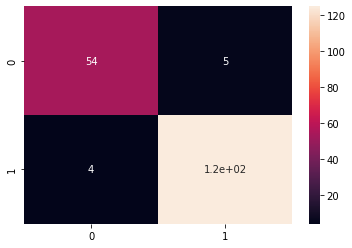

In [ ]:
sns.heatmap(confusion_matrix(Y_test, svc_pred), annot=True)
plt.show()

**Logistic Regression**

In [ ]:
model = LogisticRegression()
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9606299212598425


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.9468085106382979


In [ ]:
#confusion matrix
print(confusion_matrix(Y_test, X_test_prediction))
print(classification_report(Y_test,X_test_prediction))

[[ 57   2]
 [  8 121]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        59
           1       0.98      0.94      0.96       129

    accuracy                           0.95       188
   macro avg       0.93      0.95      0.94       188
weighted avg       0.95      0.95      0.95       188



In [ ]:
confusion_matrix(Y_test,X_test_prediction)
pd.crosstab(Y_test, svc_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,54,5,59
1,4,125,129
All,58,130,188


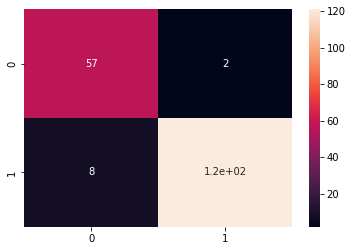

In [ ]:
sns.heatmap(confusion_matrix(Y_test, X_test_prediction), annot=True)
plt.show()

**Building a predictive syatem**

In [ ]:
breast_cancer_data['worst concavity']

0      0.7119
1      0.2416
2      0.4504
3      0.6869
4      0.4000
        ...  
564    0.4107
565    0.3215
566    0.3403
567    0.9387
568    0.0000
Name: worst concavity, Length: 569, dtype: float64

In [ ]:
#['worst radius','worst perimeter','mean concave points','worst concave points','worst area','mean perimeter',
#'mean concavity','area error','mean area','worst concavity']
input_data = (25.38,184.6,0.1471,0.2654,2019,122.8,0.3001,100,1000,0.7)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = svc_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The Breast cancer is Malignant')

else:
  print('The Breast Cancer is Benign')

[0]
The Breast cancer is Malignant


**Saving the trained model**

In [ ]:
import pickle

In [ ]:
filename = 'breast_cancer_model.sav'
pickle.dump(svc_model,open(filename,'wb'))

In [ ]:
#oading the saved model
loaded_breast_model = pickle.load(open('breast_cancer_model.sav','rb'))

checking with saved model

In [ ]:
input_data = (25.38,184.6,0.1471,0.2654,2019,122.8,0.3001,100,1000,0.7)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_breast_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The Breast cancer is Malignant')

else:
  print('The Breast Cancer is Benign')

[0]
The Breast cancer is Malignant
